# Trực quan hóa dữ liệu 

Notebook này trực quan hóa bộ `processed_data.csv` (World Bank 2000-2024) để nhanh chóng nắm bắt sự thay đổi về tăng trưởng kinh tế, chất lượng sống,... và các yếu tố khác.

Notebook này làm việc trực tiếp với dữ liệu gốc (chưa chuẩn hoá) nhằm giữ lại và thể hiện rõ phân phối, đặc tính của các thuộc tính trong thực tế.


## Mục tiêu
- Tóm tắt cấu trúc dữ liệu sau bước tiền xử lý.

- Minh họa các xu hướng chính bằng những biểu đồ quen thuộc của `seaborn` và `matplotlib`.

- Khám phá những insight quan trọng thu được từ  biểu đồ.


## Quy trình thực hiện
1. Chuẩn bị môi trường (thư viện, theme đồ họa).

2. Đọc dữ liệu đã làm sạch và rà soát sơ bộ.

3. Dựng từng nhóm biểu đồ (kinh tế, phúc lợi, hạ tầng, môi trường) kèm giải thích chi tiết.

4. Tổng hợp insight và tổng kết.


## Bước 1 - Chuẩn bị môi trường
Import các thư viện nền tảng và thiết lập style tối giản để biểu đồ nhất quán giữa các bước.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 120
pd.options.display.float_format = lambda x: f"{x:,.2f}"

DATA_PATH = Path("../data/processed/processed_data.csv")
DATA_PATH


WindowsPath('../data/processed/processed_data.csv')

## Bước 2 - Đọc dữ liệu


In [2]:
df = pd.read_csv(DATA_PATH)

df["year"] = df["year"].astype(int)

print(f"Số dòng: {df.shape[0]}\nSố cột: {df.shape[1]}")
df.head()

Số dòng: 5208
Số cột: 13


,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
0,Aruba,ABW,2000,"90,588.00",1.03,72.94,"20,681.02",7.62,55.11,91.70,95.23,2.97,61.14
1,Aruba,ABW,2001,"91,439.00",0.94,73.04,"20,740.13",4.18,57.81,100.00,95.36,2.97,61.14
2,Aruba,ABW,2002,"92,074.00",0.69,73.14,"21,307.25",-0.94,59.47,100.00,95.48,3.23,61.14
3,Aruba,ABW,2003,"93,128.00",1.14,73.24,"21,949.49",1.11,59.72,100.00,95.61,3.68,61.14
4,Aruba,ABW,2004,"95,138.00",2.14,73.22,"23,700.63",7.29,58.68,100.00,95.74,3.67,61.14


## Bước 3 - Phân tích phân phối các biến quan trọng quyết định tới tuổi thọ


### 3.1. Vẽ ma trận tương quan giữa các thuộc tính

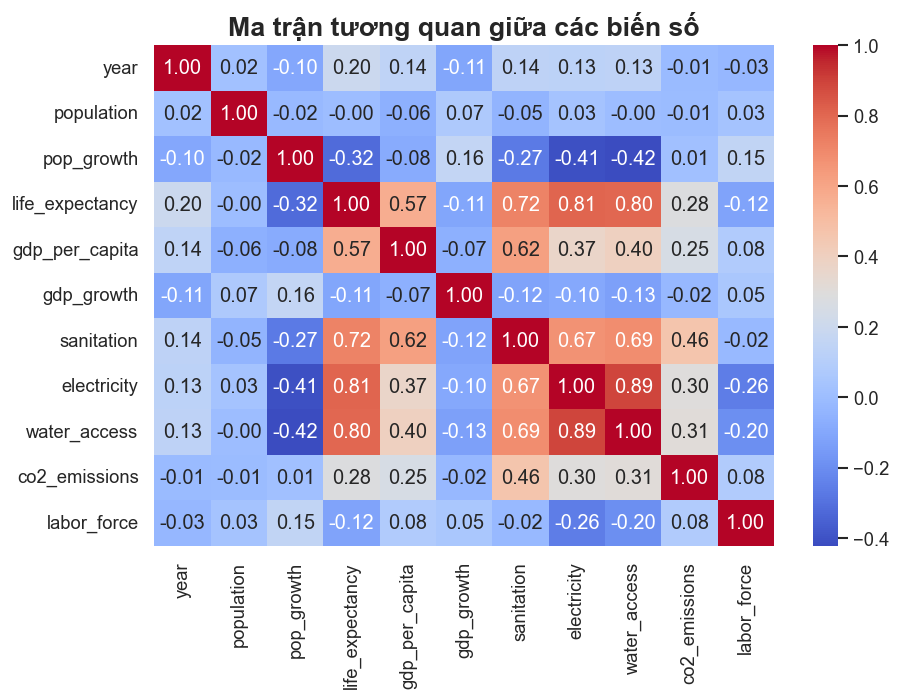

In [3]:
# Hiển thị heatmap tương quan để phục vụ việc lựa chọn biến dự đoán
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số", fontsize=16, fontweight='bold')
plt.tight_layout()

### Nhận xét:

- Các biến `electricity`, `water_access`, `sanitation` và `gdp_per_capital` có chỉ số tương quan lớn với biến mục tiêu life_expectancy. Do đó, ta sẽ tập trung đi phân tích các biến này.

- Các biến hạ tầng có tương quan cao với nhau: `electricity`, `water_access` và `sanitation`. 
Điều này cho thấy: Các quốc gia có hạ tầng tốt (điện, nước, vệ sinh) thường có tuổi thọ cao hơn, và những nước đó có tăng trưởng dân số thấp hơn (cả 3 biến này đều có tương quan âm với `pop_growth`).

### 3.2. Kiểm tra phân phối của các chỉ số hạ tầng cơ bản
Vẽ histogram + KDE cho `electricity`, `water_access` và `sanitation` để quan sát phân phối và độ lệch dữ liệu của các chỉ số hạ tầng cơ bản này.


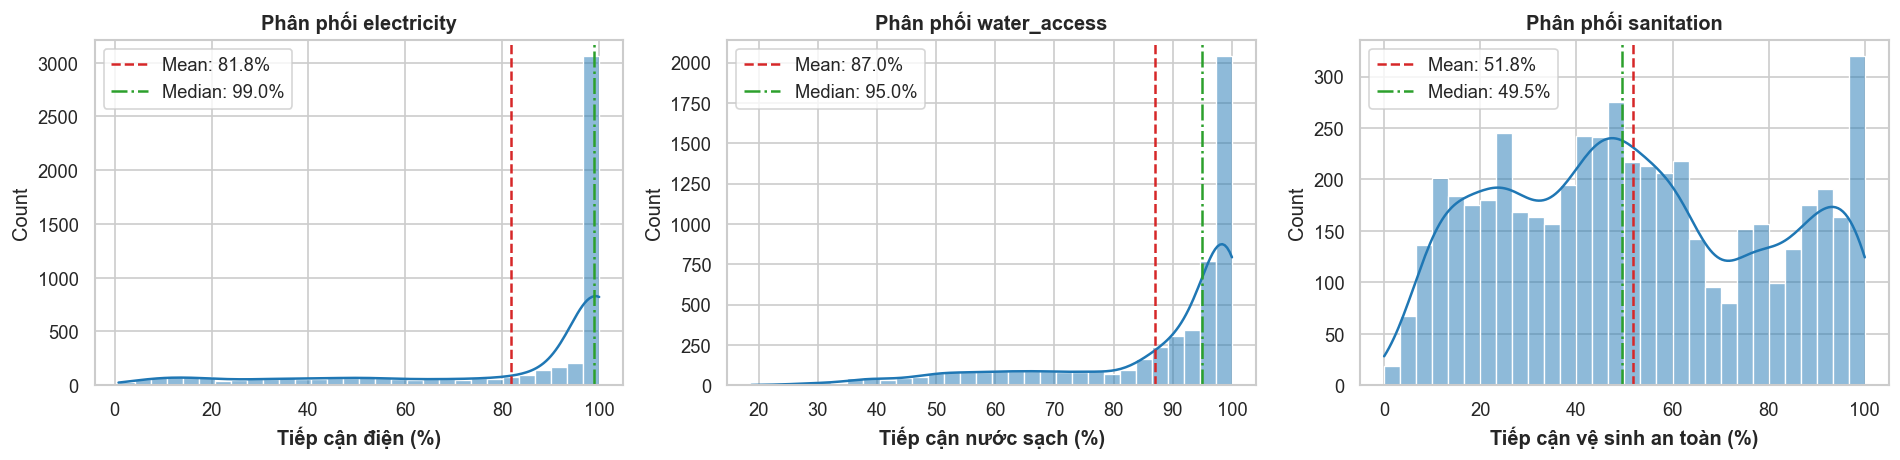

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

label_dict = {
    'electricity': 'Tiếp cận điện (%)',
    'water_access': 'Tiếp cận nước sạch (%)',
    'sanitation': 'Tiếp cận vệ sinh an toàn (%)'
}

for ax, indicator in zip(axes, ['electricity', 'water_access', 'sanitation']):
    sns.histplot(df[indicator], bins=30, kde=True, ax=ax, color='#1f77b4')
    mean_val = df[indicator].mean()
    median_val = df[indicator].median()
    ax.axvline(mean_val, color='#d62728', linestyle='--', label=f'Mean: {mean_val:.1f}%')
    ax.axvline(median_val, color='#2ca02c', linestyle='-.', label=f'Median: {median_val:.1f}%')
    ax.set_title(f'Phân phối {indicator}', fontweight='bold')
    ax.set_xlabel(label_dict[indicator], fontweight='bold')
    ax.legend()

plt.tight_layout()


### Nhận xét:
- `electricity` và `water access`: 
   - Cả hai chỉ số đều có phân phối lệch trái mạnh. 

   - Hầu hết quốc gia đã tiếp cận được điện và nước sạch, phản ánh sự phổ cập hạ tầng cơ bản ở mức độ toàn cầu. 

   - Tồn tại nhóm quốc gia thiểu số với độ phủ dưới 50%, chỉ ra sự bất bình đẳng trong tiếp cận hạ tầng cơ bản.


- `sanitation`: 
   - Dữ liệu trải rộng trên toàn bộ khoảng giá trị từ gần 0% đến 100%.
   
   - Dữ liệu tập trung dày đặc ở hai cực: nhóm dưới 40% (các quốc gia kém phát triển và đang phát triển) và nhóm bão hòa tại 95-100% (các quốc gia phát triển).

### 3.3. Phân phối GDP bình quân đầu người
Tại bước này, ta sử dụng biểu đồ histogram để thể hiện phân phối của GDP bình quân đầu người (`GDP per capita`). Thêm các đường phần trăm (10/50/90) để thể hiện rõ sự chênh lệch thu nhập giữa các nhóm quốc gia.


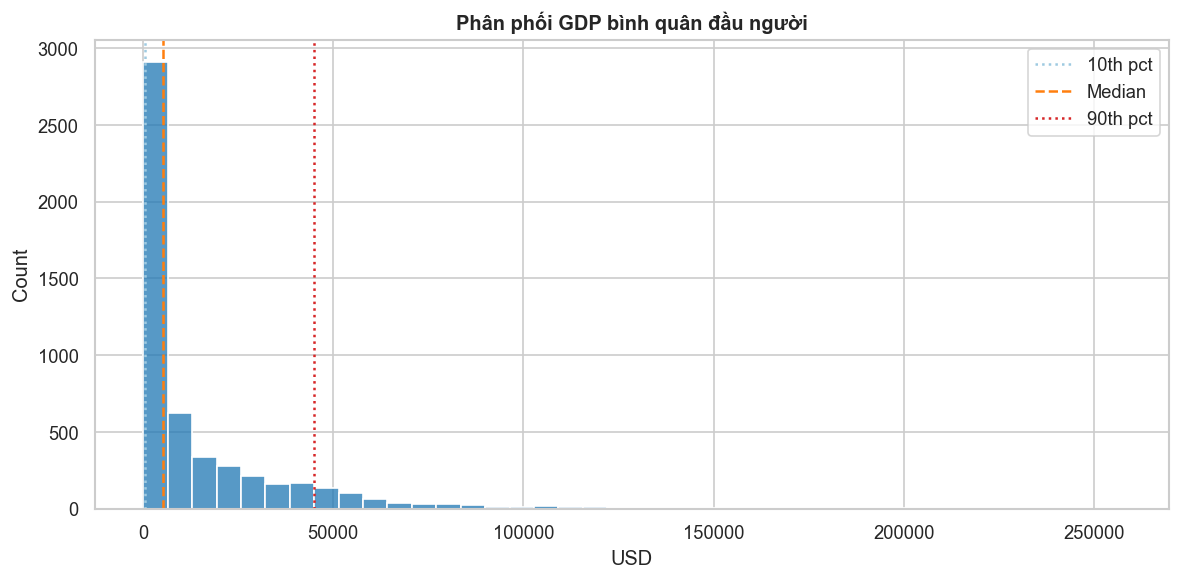

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

gdp_q10, gdp_q50, gdp_q90 = df["gdp_per_capita"].quantile([0.10, 0.50, 0.90])

sns.histplot(df["gdp_per_capita"], bins=40, ax=ax, color="#1f77b4")
ax.axvline(gdp_q10, color="#9ecae1", linestyle=":", label="10th pct")
ax.axvline(gdp_q50, color="#ff7f0e", linestyle="--", label="Median")
ax.axvline(gdp_q90, color="#d62728", linestyle=":", label="90th pct")
ax.set_title("Phân phối GDP bình quân đầu người", fontweight='bold')
ax.set_xlabel("USD")
ax.legend()


plt.tight_layout()

### Nhận xét:
- Phân phối cực kỳ lệch phải cho thấy chênh lệch giàu nghèo của các quốc gia trên thế giới là cực kỳ lớn. Khoảng cách giữa các quốc gia nghèo nhất và giàu nhất là rất lớn.

- Hầu hết quốc gia có GDP thấp, cho thấy đa số thế giới vẫn còn khá nghèo.

- Khoảng cách rất xa từ đường trung vị (median) đến nhóm 10% giàu nhất phản ánh rào cản rất lớn để một quốc gia bứt phá từ mức thu nhập trung bình lên mức thu nhập cao.



### 3.4. Phân phối tuổi thọ trung bình
Ta tiếp tục phân tích phân phối của biến mục tiêu `life_expectancy` để hiểu rõ sự chênh lệch về tuổi thọ giữa các quốc gia.

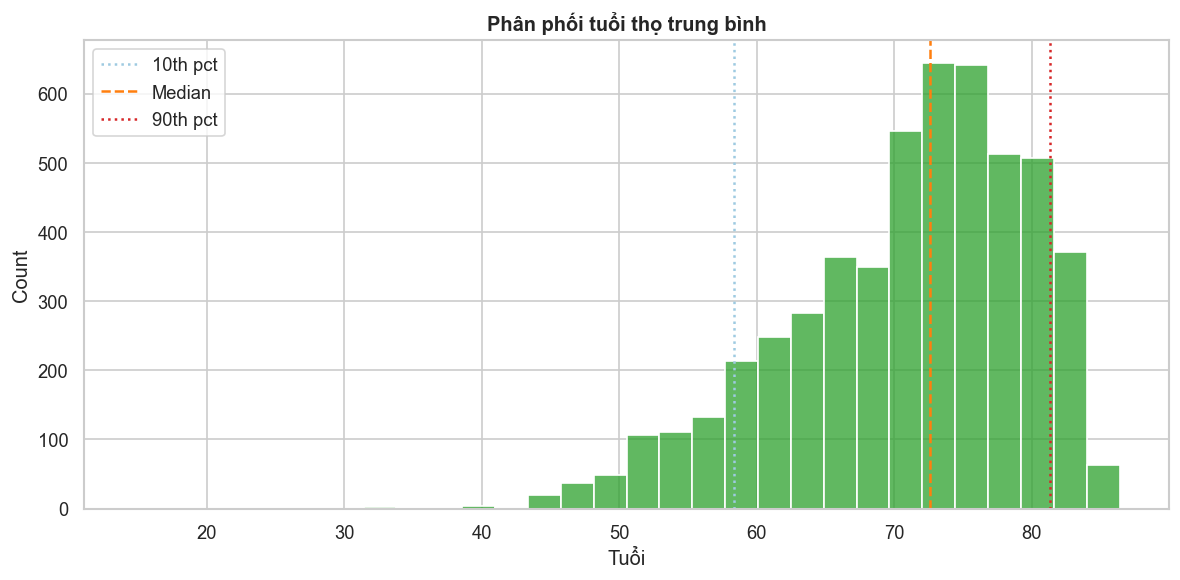

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

life_q10, life_q50, life_q90 = df["life_expectancy"].quantile([0.10, 0.50, 0.90])

sns.histplot(df["life_expectancy"], bins=30, ax=ax, color="#2ca02c")
ax.axvline(life_q10, color="#9ecae1", linestyle=":", label="10th pct")
ax.axvline(life_q50, color="#ff7f0e", linestyle="--", label="Median")
ax.axvline(life_q90, color="#d62728", linestyle=":", label="90th pct")
ax.set_title("Phân phối tuổi thọ trung bình", fontweight='bold')
ax.set_xlabel("Tuổi")
ax.legend()


plt.tight_layout()

### Nhận xét:
- Phần lớn các quốc gia đều đạt mức tuổi thọ trung bình từ 60 - 80 tuổi.

- Phần đuôi kéo dài về phía bên trái (đại diện cho các giá trị dưới 60 tuổi), tuy chiếm tỷ lệ nhỏ nhưng phản ánh các quốc gia đang đối mặt với khủng hoảng nhân đạo nghiêm trọng.

- Dữ liệu tuổi thọ trên 80 giảm đột ngột, cho thấy việc phát triển các yếu tố kinh tế - xã hội và nhân khẩu học sẽ chỉ làm tăng tuổi thọ đến một ngưỡng nào đó. 


## Bước 4. Phân tích mối quan hệ giữa các thuộc tính quan trọng

### 4.1. Quan hệ giữa GDP bình quân và tuổi thọ
Ta sử dụng biểu đồ `regplot` để vẽ biểu đồ phân tán (scatter plot) kèm theo đường hồi quy, nhằm trực quan hóa mối quan hệ giữa hai thuộc tính.

Ở đây, ta sử dụng thang log ở trục X do đặc điểm của biến GDP (khoảng cách giàu nghèo giữa các quốc gia top đầu và quốc gia top cuối là rất lớn)


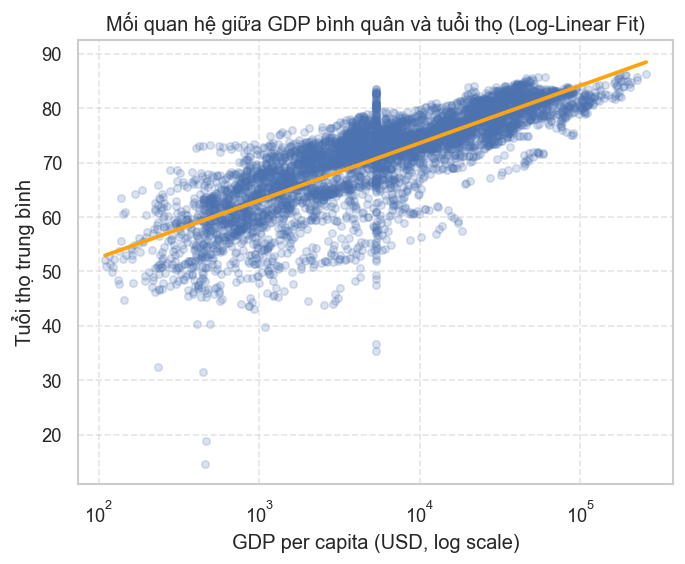

In [7]:
sns.regplot(
    data=df,
    x="gdp_per_capita",
    y="life_expectancy",
    scatter_kws={"alpha": 0.2, "s": 20},
    line_kws={"color": "#ffa30e"},
    logx=True
)

plt.xscale("log") # Vẫn giữ log scale để nhìn dữ liệu tản ra
plt.xlabel("GDP per capita (USD, log scale)")
plt.ylabel("Tuổi thọ trung bình")
plt.title("Mối quan hệ giữa GDP bình quân và tuổi thọ (Log-Linear Fit)")
plt.grid(True, linestyle='--', alpha=0.5) # Thêm lưới cho dễ nhìn

### Nhận xét:
- Cứ mỗi lần GDP tăng gấp 10 lần, thì tuổi thọ sẽ tăng thêm một số năm nhất định. Do đó, đối với các nước càng giàu, cái giá phải trả cho việc tăng thêm tuổi thọ ngày càng đắt.

- Đối với các nước nghèo và các nước đang phát triển, các chấm xanh tản ra rất rộng (từ 30 đến 70 tuổi). Nói cách khác các nước này có số phận rất khác nhau (có nước GDP không cao nhưng yên bình, có nước nghèo lại chiến tranh/dịch bệnh nên tuổi thọ thấp).

- Đối với các nước giàu, các chấm xanh co cụm lại rất sát đường màu cam. Điều này cho thấy khi đã giàu, chất lượng sống của các nước khá đồng đều.

### 4.2. Mối quan hệ giữa hạ tầng cơ bản với tuổi thọ
Phân tích trực tiếp mức độ phủ `sanitation`, `water_access` và `electricity` so với `life_expectancy` để xem biến hạ tầng nào gắn với tuổi thọ mạnh nhất.


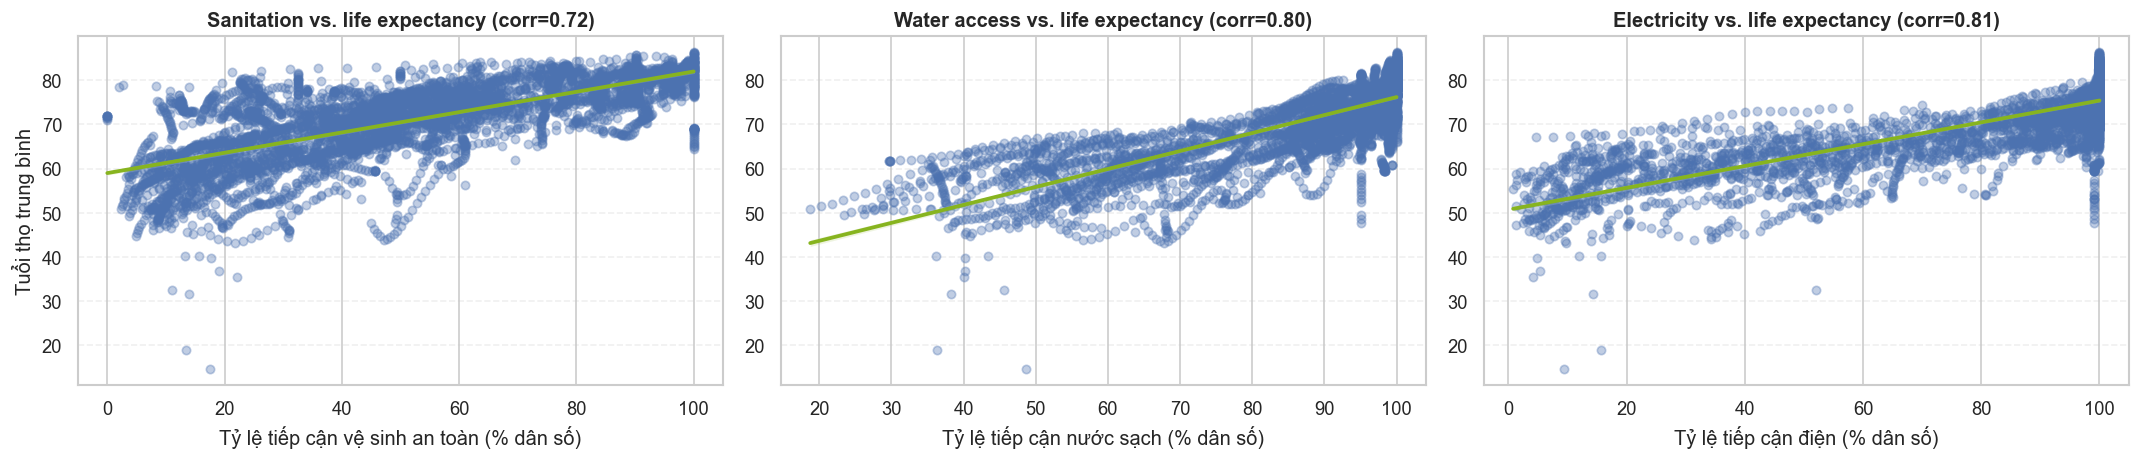

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

indicator_labels = {
    'sanitation': 'Tỷ lệ tiếp cận vệ sinh an toàn (% dân số)',
    'water_access': 'Tỷ lệ tiếp cận nước sạch (% dân số)',
    'electricity': 'Tỷ lệ tiếp cận điện (% dân số)'
}

title_labels = {
    'sanitation': 'Sanitation vs. life expectancy',
    'water_access': 'Water access vs. life expectancy',
    'electricity': 'Electricity vs. life expectancy'
}

for ax, indicator in zip(axes, indicator_labels.keys()):
    sns.regplot(
        data=df,
        x=indicator,
        y='life_expectancy',
        scatter_kws={'alpha': 0.35, 's': 25},
        line_kws={'color': "#87b41f"},
        ax=ax
    )
    corr = df[[indicator, 'life_expectancy']].corr().iloc[0, 1]
    ax.set_title(f"{title_labels[indicator]} (corr={corr:.2f})", fontweight='bold')
    ax.set_xlabel(indicator_labels[indicator])
    ax.set_ylabel('Tuổi thọ trung bình' if indicator == 'sanitation' else '')
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()


## Bước 5 - Phân tích dữ liệu toàn cầu qua các năm

Tại bước này, ta tiến hành được gộp theo trung bình cộng có trọng số theo dân số của từng quốc gia qua từng năm. Cách làm này cho trọng số cao hơn cho các quốc gia có dân số lớn, do đó kết quả sẽ chính xác và hợp lý hơn về tính thực tiễn.

### 5.1. Xu hướng GDP bình quân đầu người theo thời gian

#### 5.1.1. Tính weighted mean GDP của từng quốc gia theo năm

In [9]:
def weighted_mean_gdp(data):
    """Tính weighted mean GDP theo population"""
    return (data['gdp_per_capita'] * data['population']).sum() / data['population'].sum()

gdp_trend_data = []
for year in sorted(df['year'].unique()):
    year_data = df[df['year'] == year]
    weighted_gdp = weighted_mean_gdp(year_data)
    gdp_trend_data.append({'year': year, 'weighted_gdp_per_capita': weighted_gdp})

gdp_trend = pd.DataFrame(gdp_trend_data)

#### 5.1.2. Vẽ biểu đồ lineplot

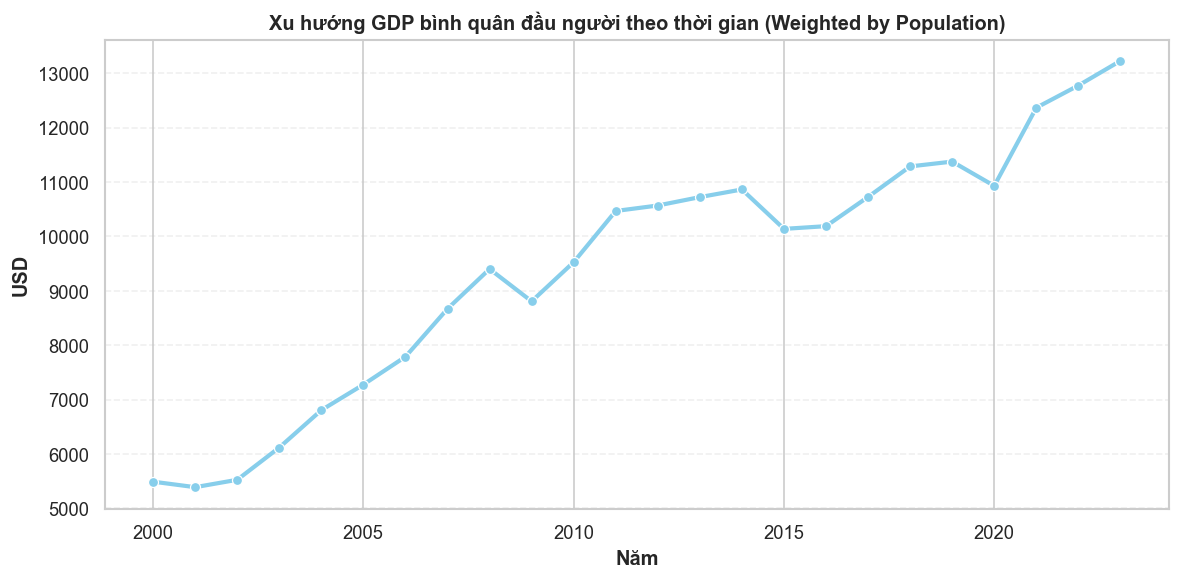

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=gdp_trend,
    x="year",
    y="weighted_gdp_per_capita",
    marker="o",
    color="skyblue",
    linewidth=2.5,
    markersize=6
)
plt.ylabel("USD", fontweight='bold')
plt.xlabel("Năm", fontweight='bold')
plt.title("Xu hướng GDP bình quân đầu người theo thời gian (Weighted by Population)", fontweight='bold', fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

### 5.2. Phân tích các chỉ số hạ tầng cơ bản qua từng năm
Ta phân tích xu hướng của các biến: `water_access`, `electricity` và `sanitation` theo thời gian. Ba chỉ số này sẽ cùng được vẽ trên một biểu đồ để dễ dàng so sánh tốc độ phát triển của từng yếu tố hạ tầng cơ bản.

#### 5.2.1. Tính weight mean water_access/electricity/sanitation của từng quốc gia theo năm

In [11]:
# Tính weighted mean cho services_trend (electricity, water_access, sanitation)
services_trend_weighted = []
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    for indicator in ['electricity', 'water_access', 'sanitation']:
        weighted_coverage = (year_data[indicator] * year_data['population']).sum() / year_data['population'].sum()
        services_trend_weighted.append({
            'year': year,
            'indicator': indicator,
            'coverage': weighted_coverage
        })

services_trend_weighted_df = pd.DataFrame(services_trend_weighted)

#### 5.2.2. Vẽ biểu đồ lineplot

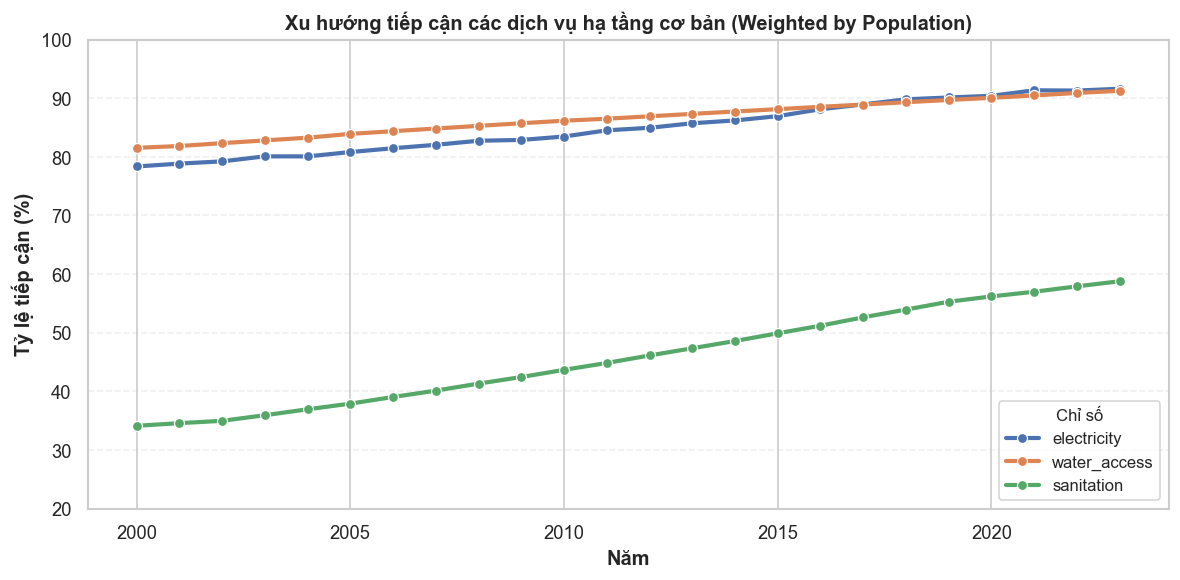

In [12]:
# Tính weighted mean cho services_trend (electricity, water_access, sanitation)
services_trend_weighted = []
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    for indicator in ['electricity', 'water_access', 'sanitation']:
        weighted_coverage = (year_data[indicator] * year_data['population']).sum() / year_data['population'].sum()
        services_trend_weighted.append({
            'year': year,
            'indicator': indicator,
            'coverage': weighted_coverage
        })

services_trend_weighted_df = pd.DataFrame(services_trend_weighted)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=services_trend_weighted_df,
    x="year",
    y="coverage",
    hue="indicator",
    marker="o",
    linewidth=2.5,
    markersize=6
)
plt.ylim(20, 100)
plt.ylabel("Tỷ lệ tiếp cận (%)", fontweight='bold')
plt.xlabel("Năm", fontweight='bold')
plt.title("Xu hướng tiếp cận các dịch vụ hạ tầng cơ bản (Weighted by Population)", fontweight='bold', fontsize=12)
plt.legend(title="Chỉ số", title_fontsize='10', fontsize='10', loc='lower right')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

### Nhận xét:
- Hai chỉ số `electricity` và `water access` có sự tăng trưởng nhẹ, cho thấy sự bão hòa về tỷ lệ dân số tiếp cận điện và nước sạch.

- `sanitation` là chỉ số tăng vượt bậc nhất (từ ~35% năm 2000 đến gần 60% năm 2023). Tuy nhiên, tỷ lệ dân số tiếp cận vệ sinh an toàn còn cách xa rất nhiều so với hai chỉ số `electricity` và `water_access`. Điều này cho thấy, để tăng cường tuổi thọ, các quốc gia cần tập trung phổ cập vệ sinh an toàn đến người dân.

## Tổng kết 

- Có sự bất bình đẳng rất lớn về mặt thu nhập giữa các quốc gia trên thế giới. Đồng thời, GDP cũng có mối quan hệ nhất định với tuổi thọ trung bình của một quốc gia (GDP tăng gấp 10 lần thì tuổi thọ tăng lên một con số nhất định). Tuy nhiên, việc tăng trường GDP đến mức nhất định sẽ làm tuổi thọ bị chững lại.

- Các biến `sanitation`, `electricity` và `water_access` đều có mối tương quan rất lớn tới tuổi thọ. Tuy nhiên, hai chỉ số `electricy` và `water_access` đã gần bão hòa. Do đố, các quốc gia cần có các chính sách lấy vệ sinh an toàn làm nền tảng để tăng cường tuổi thọ cho người dân.

- Có sự chênh lệch lớn về tỷ lệ tiếp cận nước sạch, điện và vệ sinh an toàn giữa các quốc gia giàu nghèo trên thế giới.

- Việc phát triển các yếu tố kinh tế - xã hội và nhân khẩu học sẽ chỉ làm tăng tuổi thọ đến một ngưỡng nào đó. 